In [578]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [579]:
plt.rcParams['figure.figsize'] = (16, 8)
pd.set_option('display.max_rows', None)

In [580]:
df = pd.read_csv('breast-cancer-dataset.csv', index_col=[0])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [581]:
df.shape

(569, 31)

In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [583]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [584]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Предварительный анализ датасета: 569 наблюдения и 31 признак, пропусков данных нет.

Датасет содержит наблюдения признаков ядер клеток, рассчитанных по оцифрованному изображению образцов тканей молочной железы, взятых методом биопсии аспирации тонкой иглы.

В каждом наблюдении для ядра клетки рассчитаны следующие признаки:

1. radius - радиус (среднее расстояние от центра до на границы периметра)
2. texture - текстура (стандартное отклонение значений шкалы серого)
3. perimeter - периметр
4. area - область
5. smoothness - гладкость (локальное изменение радиуса)
6. compactness - компактность (perimeter^2 / area - 1.0)
7. concavity - вогнустость (выраженность вогнутых участков контура)
8. concave points - вогнутые точки (количество вогнутых частей контура)
9. symmetry - симметрия
10. fractal dimension - фрактальная размерность ("coastline approximation" - 1)

Значения каждого признака рассчитаны как среднее, стандартное отклонение и "худшее значение" (среднее от трех наибольших значений признака).

In [585]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Представлены данные для:
   Доброкачественная опухоль - 357 записей
   Злокачественная опухоль - 212 записей

In [586]:
def feature_plot(feature_name):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))
    axes = axes.ravel()
    for feature_index, ax in enumerate(axes):
        ax.figure
        ax.hist(df[feature_name[feature_index]].loc[df['diagnosis'] == 'B'], 100, alpha=0.5, label='Доброкачественная')
        ax.hist(df[feature_name[feature_index]].loc[df['diagnosis'] == 'M'], 100, alpha=0.5, label='Злокачественная')
        ax.legend(loc='upper right')
        ax.set_title(feature_name[feature_index])
    plt.tight_layout()
    plt.show()

Распределение для radius


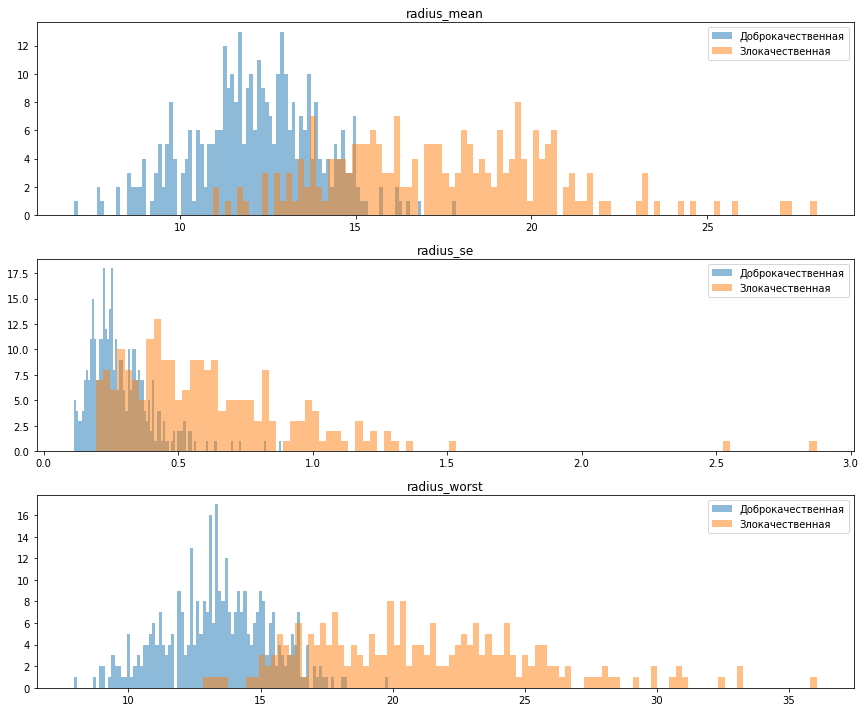

Распределение для texture


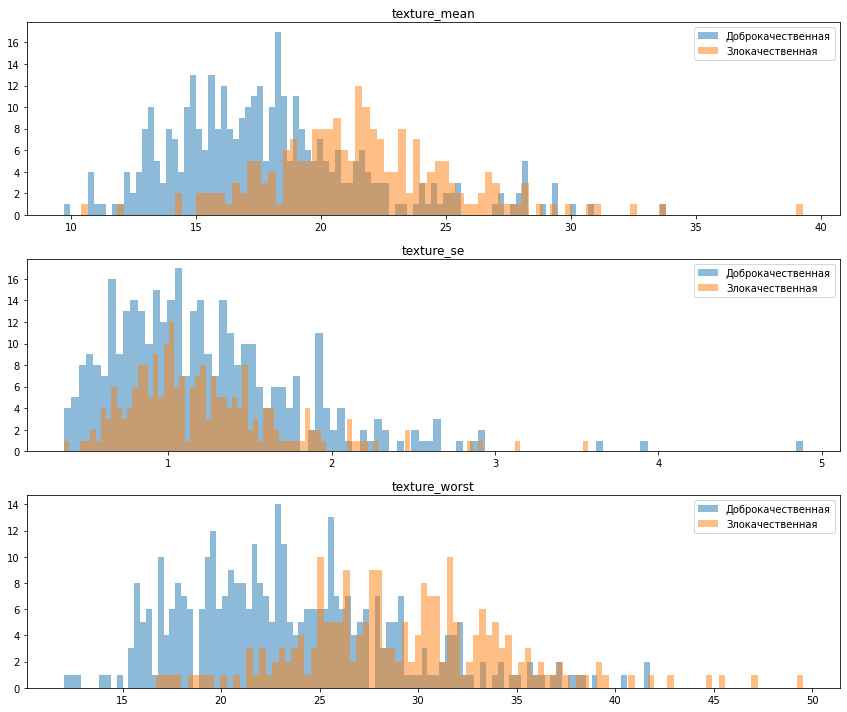

Распределение для perimeter


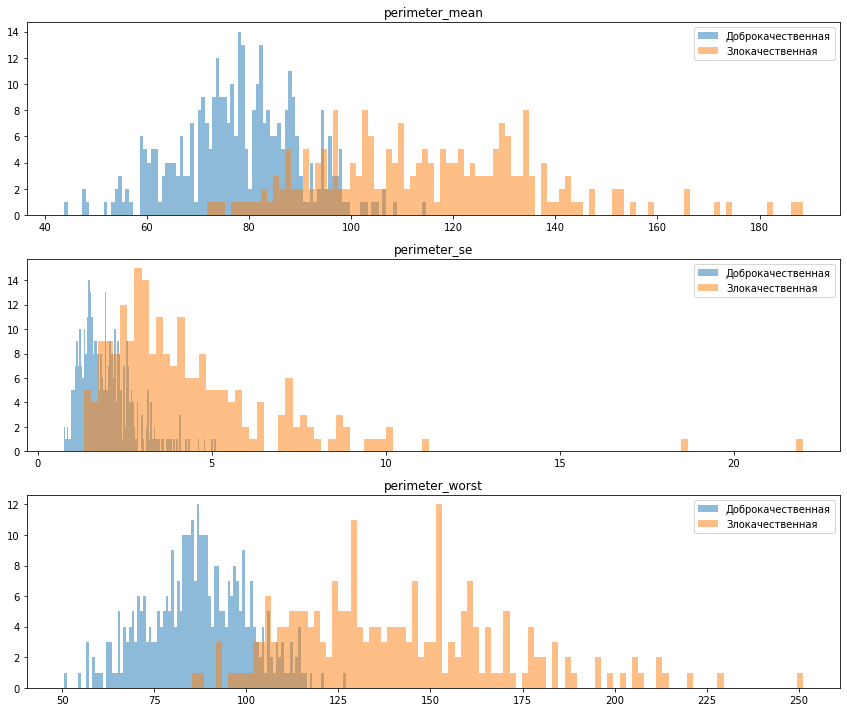

Распределение для area


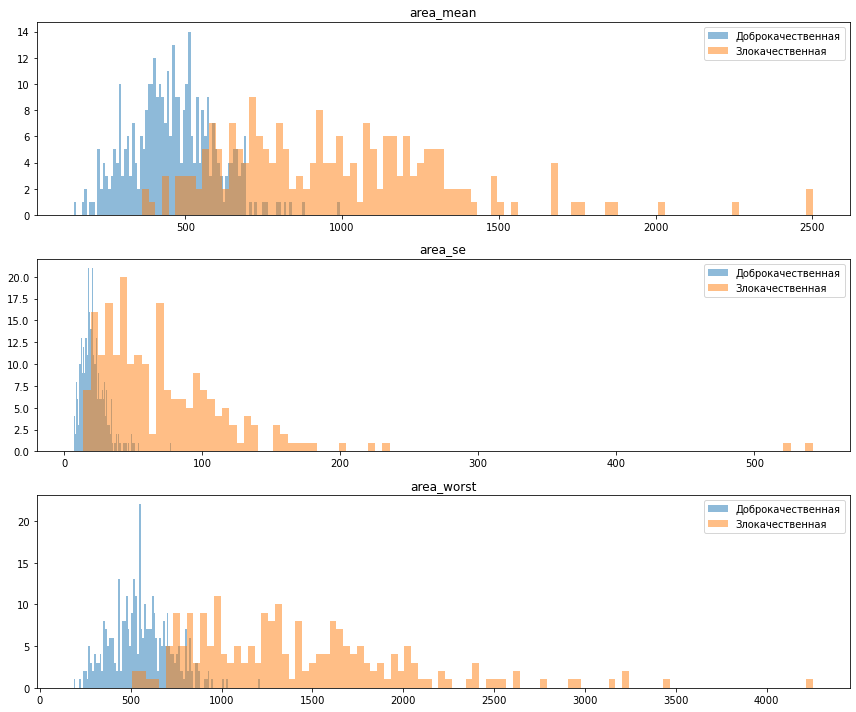

Распределение для smoothness


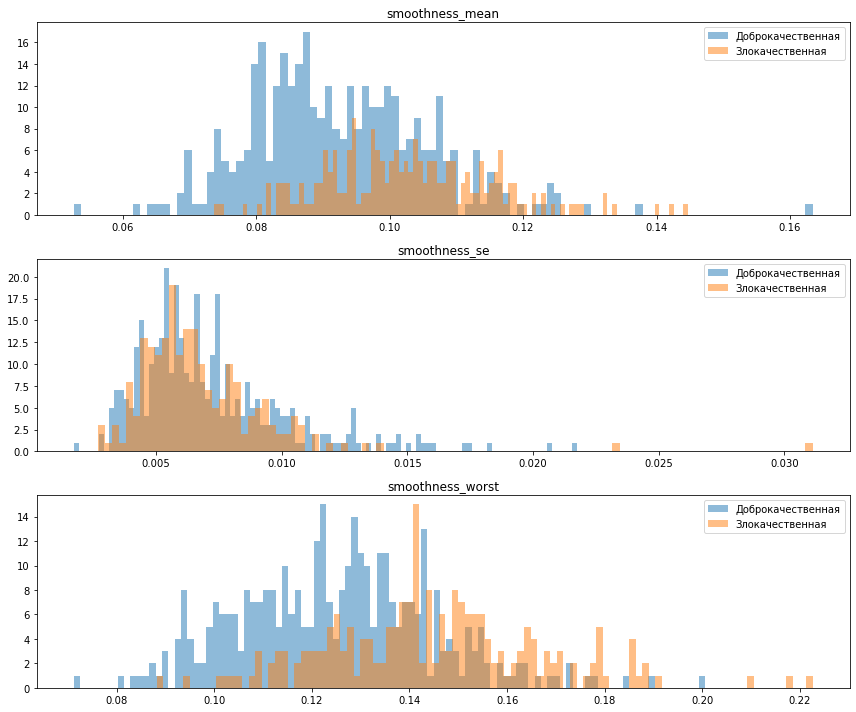

Распределение для compactness


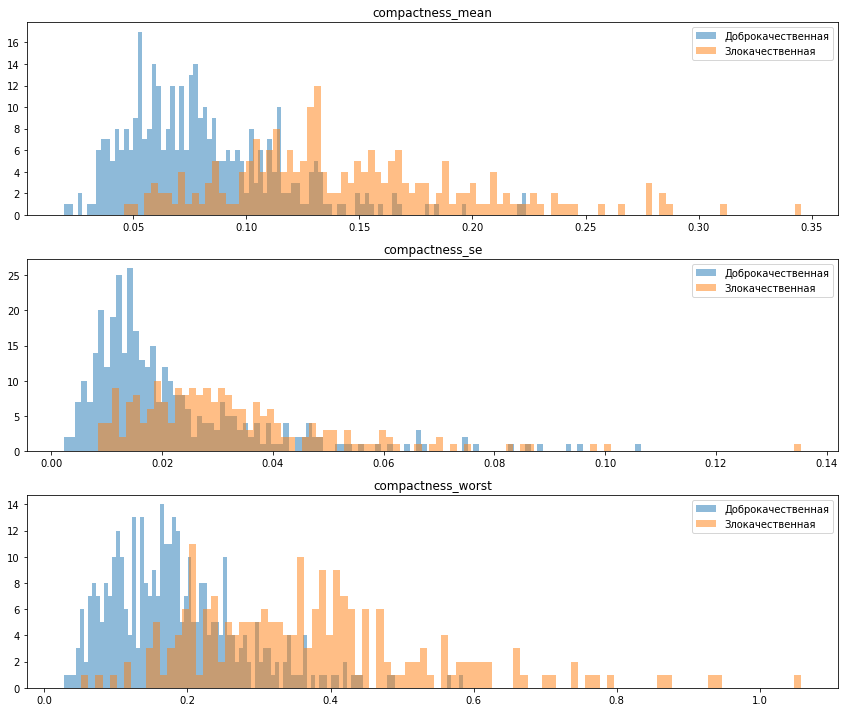

Распределение для concavity


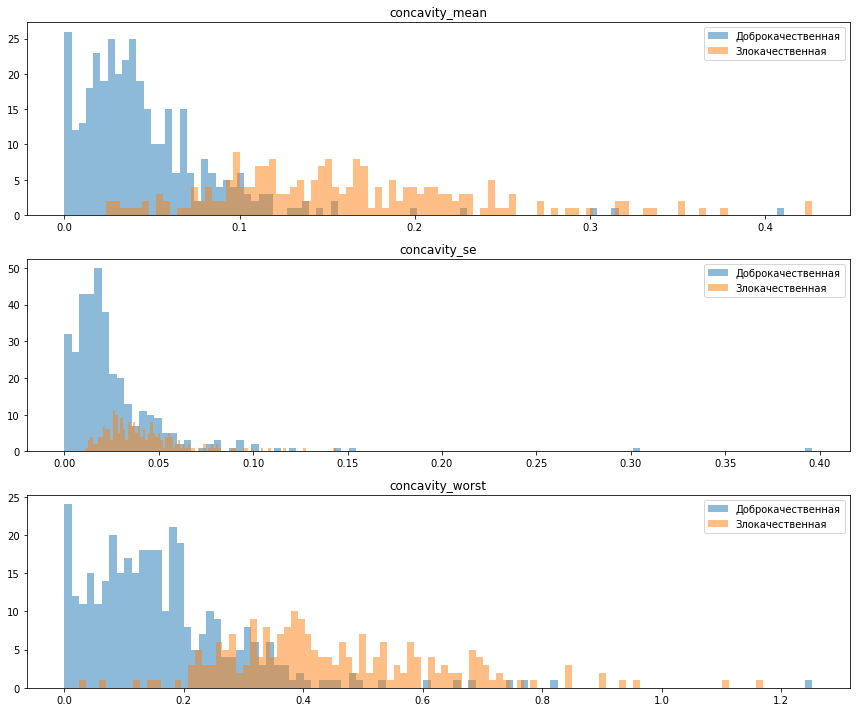

Распределение для concave points


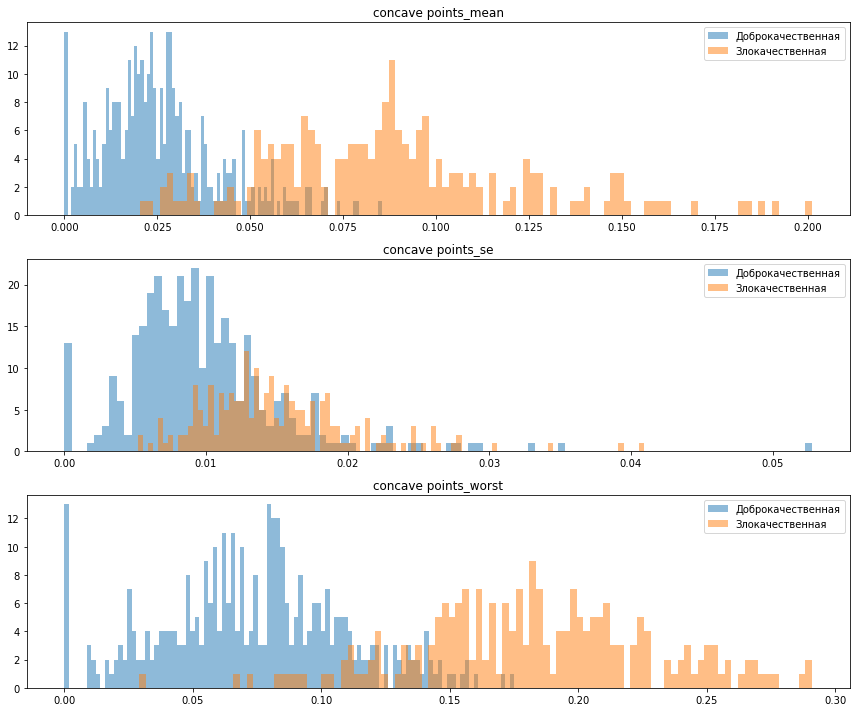

Распределение для symmetry


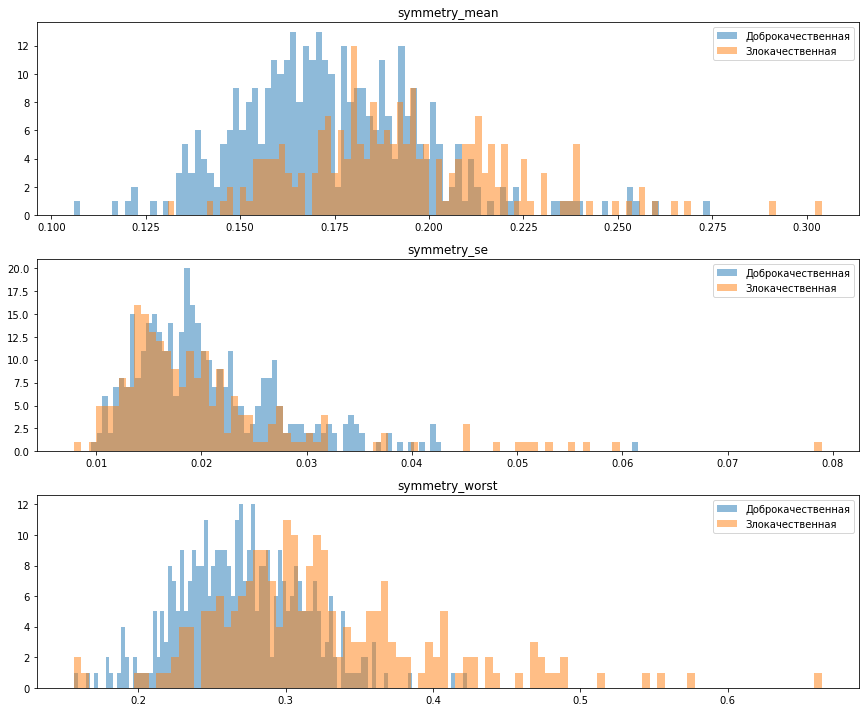

Распределение для fractal_dimension


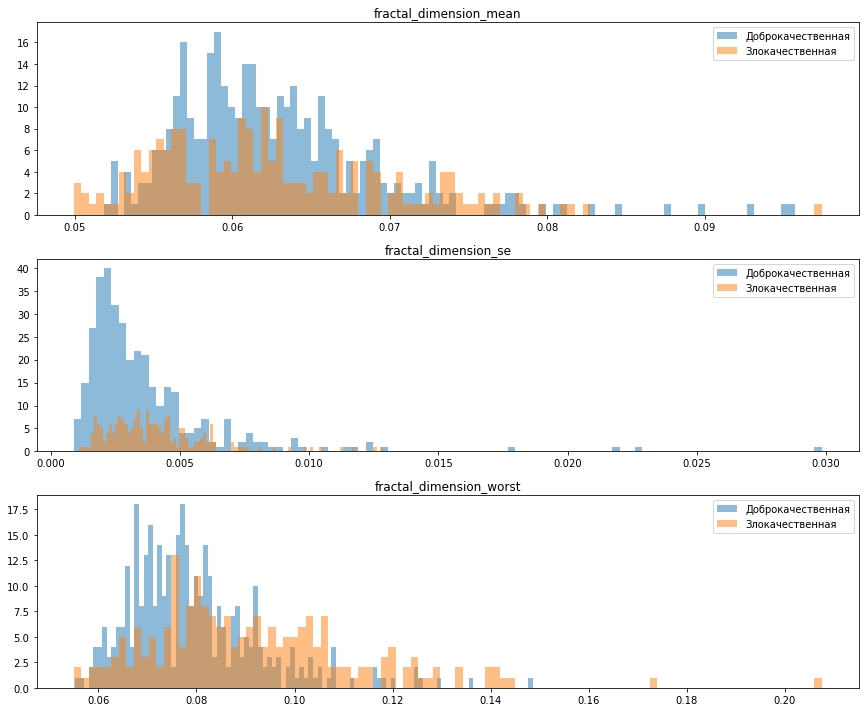

In [587]:
feature_suffix = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 
                  'symmetry', 'fractal_dimension']
feature_type = ['mean', 'se', 'worst']
for f_suffix in feature_suffix:
    feature_name = []
    for f_type in feature_type:
        feature_name.append(f_suffix + '_' + f_type)
    print(f'Распределение для {f_suffix}')
    feature_plot(feature_name)

Добавляем колонку с кодировкой типа опухоли - доброкачественная=0, злокачественная=1:

In [588]:
df['diagnosis_int'] = df['diagnosis'].map({'B':0,'M':1}).astype(int)

In [589]:
df_corr_matrix = df.corr()
print('Матрица корреляции:')
df_corr_matrix

Матрица корреляции:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_int
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


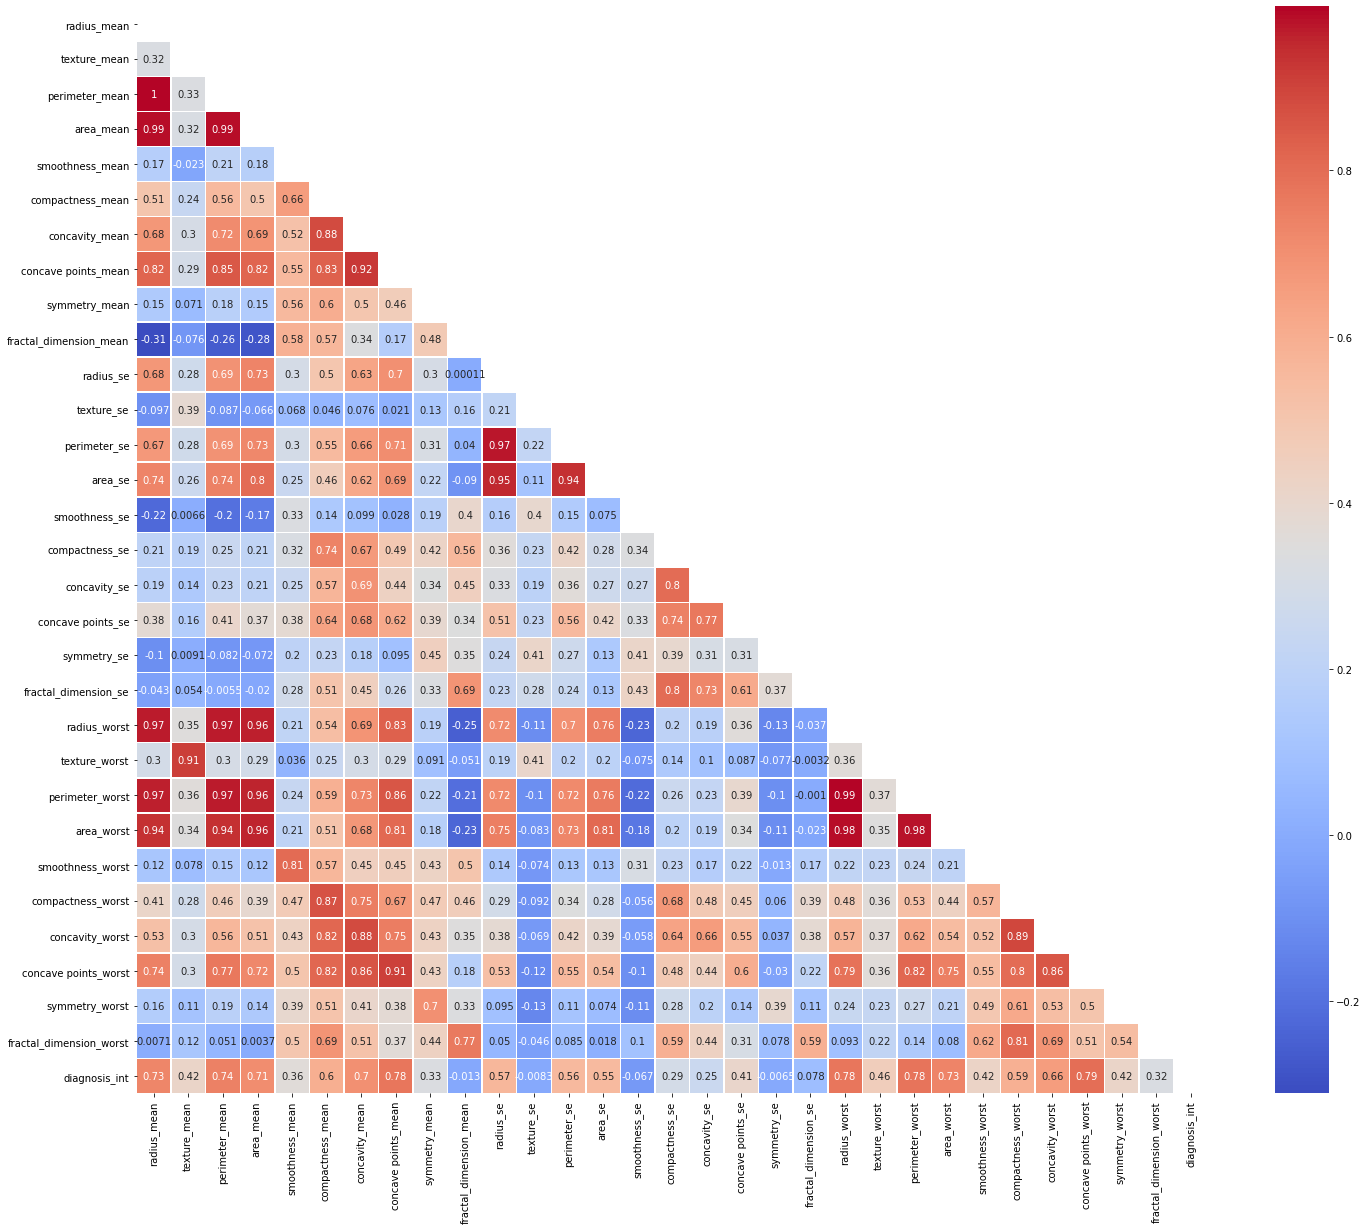

In [590]:
fig, ax = plt.subplots(figsize=(24,20))
sns.heatmap(df_corr_matrix, annot=True, mask=np.triu(df_corr_matrix), cmap='coolwarm', linewidths=.5, ax=ax)
plt.show()

In [591]:
def get_params_diagnosis(filtered_df):
    params = []
    for item in dict(filtered_df.unstack().dropna()).keys():
        if item[0] == 'diagnosis_int': 
            params.append(item[1])
        if item[1] == 'diagnosis_int':    
            params.append(item[0])
    df_mean = [column for column in set(params) if column.endswith('_mean')]
    df_se = [column for column in set(params) if column.endswith('_se')]
    df_worst = [column for column in set(params) if column.endswith('_worst')]
    params_set = set(params) if len(params) > 0 else 'Признаков, коррелириующих с целнвой переменной нет'
    return {'df_mean': df_mean, 'df_se': df_se, 'df_worst': df_worst, 'params': params_set}


def get_params(filtered_df):
    params = []
    for item in dict(filtered_df.unstack().dropna()).keys():
        if item[0] != 'diagnosis_int': 
            params.append(item[0])
        if item[1] != 'diagnosis_int':    
            params.append(item[1])
    df_mean = [column for column in set(params) if column.endswith('_mean')]
    df_se = [column for column in set(params) if column.endswith('_se')]
    df_worst = [column for column in set(params) if column.endswith('_worst')]
    return {'df_mean': df_mean, 'df_se': df_se, 'df_worst': df_worst, 'params': set(params)}

In [592]:
filtered_df_09 = df_corr_matrix[((df_corr_matrix >= 0.90) | (df_corr_matrix <= -0.90)) & (df_corr_matrix != 1.000)]
print('Пары признаков с очень высокой корреляцией > 0.9:')
df_09 = filtered_df_09.unstack().sort_values(ascending=False).dropna()
df_09

Пары признаков с очень высокой корреляцией > 0.9:


radius_mean           perimeter_mean          0.997855
perimeter_mean        radius_mean             0.997855
perimeter_worst       radius_worst            0.993708
radius_worst          perimeter_worst         0.993708
radius_mean           area_mean               0.987357
area_mean             radius_mean             0.987357
perimeter_mean        area_mean               0.986507
area_mean             perimeter_mean          0.986507
area_worst            radius_worst            0.984015
radius_worst          area_worst              0.984015
area_worst            perimeter_worst         0.977578
perimeter_worst       area_worst              0.977578
radius_se             perimeter_se            0.972794
perimeter_se          radius_se               0.972794
perimeter_mean        perimeter_worst         0.970387
perimeter_worst       perimeter_mean          0.970387
radius_mean           radius_worst            0.969539
radius_worst          radius_mean             0.969539
perimeter_

In [593]:
print('Очень сильная корреляция > 0.9 для признаков:')
params_09 = get_params(filtered_df_09)
params_09['params']

Очень сильная корреляция > 0.9 для признаков:


{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'radius_worst',
 'texture_mean',
 'texture_worst'}

In [594]:
print('Признаки с очень сильной корреляцией (> 0.9) с целевой переменной:')
get_params_diagnosis(filtered_df_09)['params']

Признаки с очень сильной корреляцией (> 0.9) с целевой переменной:


'Признаков, коррелириующих с целнвой переменной нет'

Построим парные графики для выявления линейной зависимости между признаками:

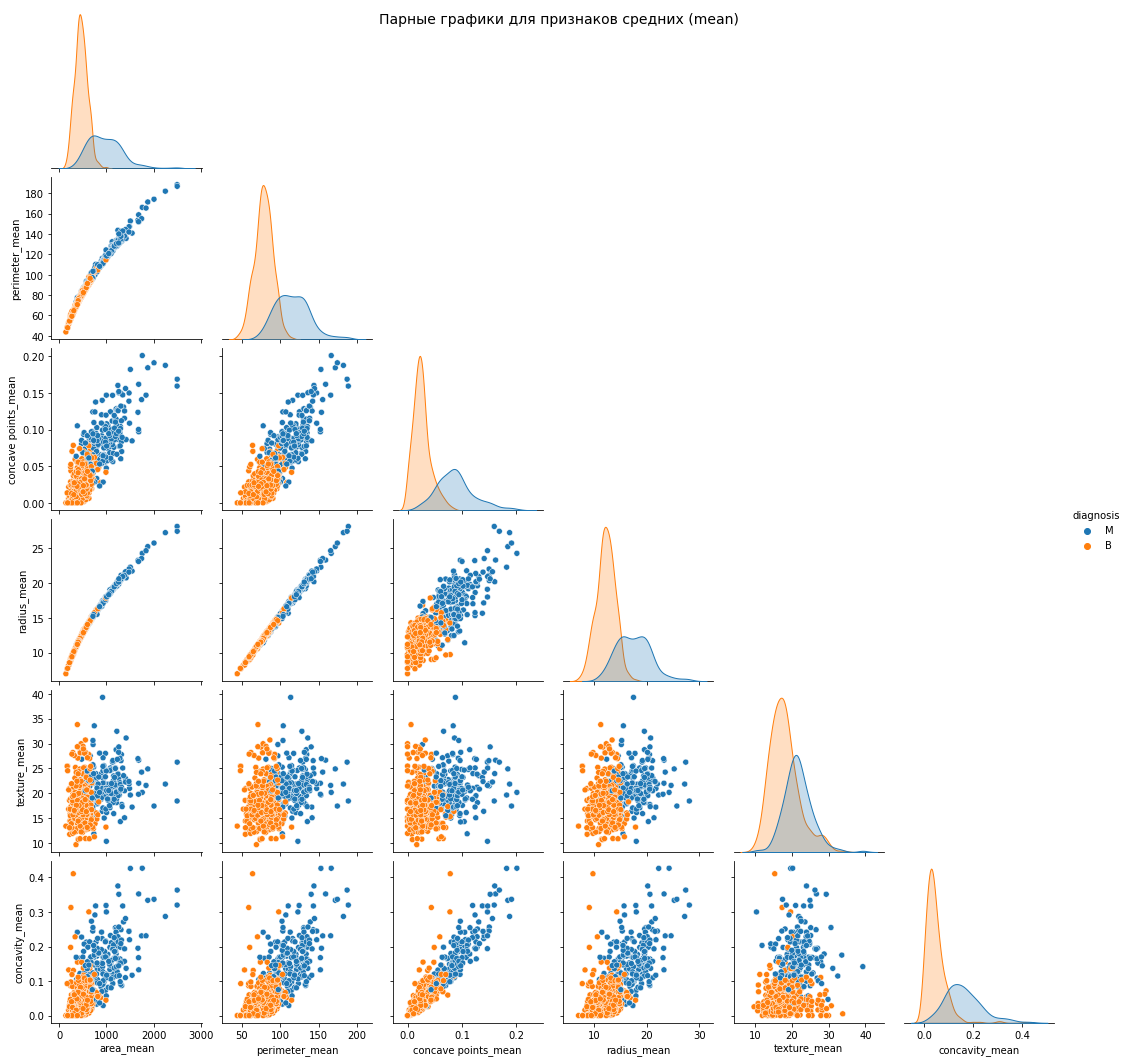

In [595]:
if params_09.get('df_mean'):
    dfmean = df[params_09['df_mean']]
    dfmean.insert(loc=0, column='diagnosis', value=df[df.columns[0]])
    sns.pairplot(data=dfmean, hue='diagnosis', corner=True).fig.suptitle('Парные графики для признаков средних (mean)', fontsize = 14);

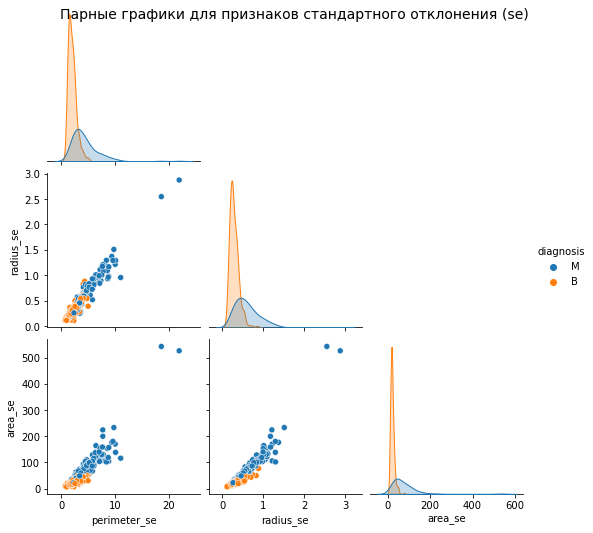

In [596]:
if params_09.get('df_se'):
    dfse = df[params_09['df_se']]
    dfse.insert(loc=0, column='diagnosis', value=df[df.columns[0]])
    sns.pairplot(data=dfse, hue='diagnosis', corner=True).fig.suptitle('Парные графики для признаков стандартного отклонения (se)', fontsize = 14);

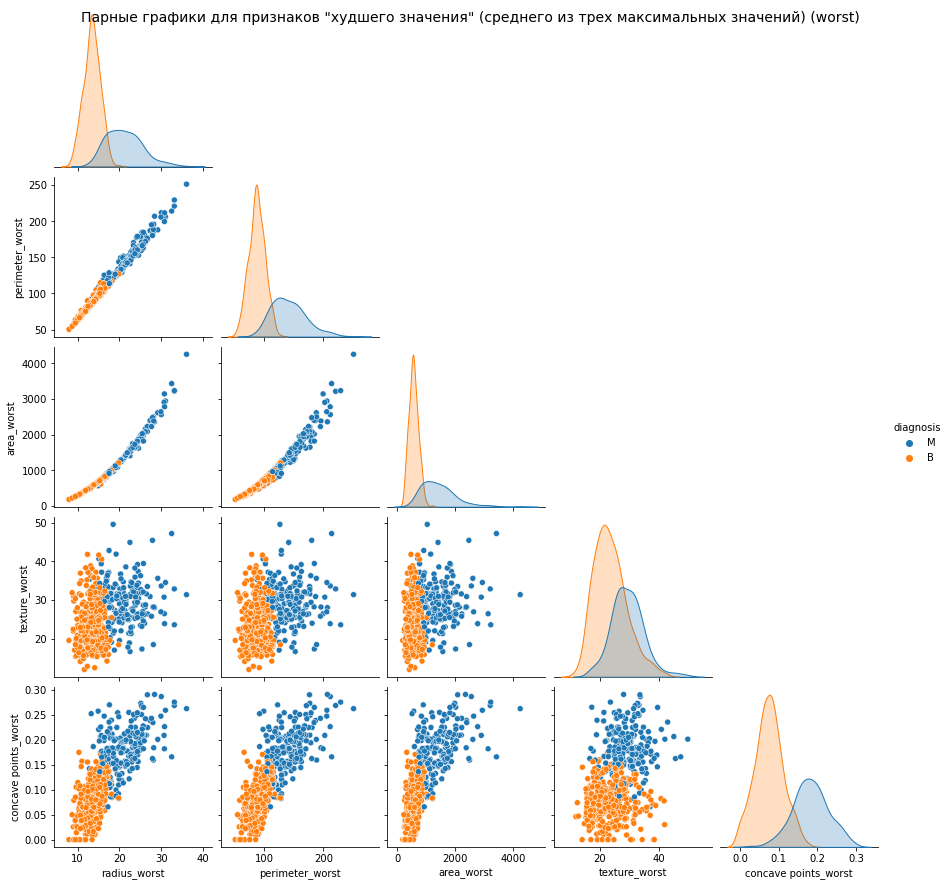

In [597]:
if params_09.get('df_worst'):
    dfworst = df[params_09['df_worst']]
    dfworst.insert(loc=0, column='diagnosis', value=df[df.columns[0]])
    sns.pairplot(data=dfworst, hue='diagnosis', corner=True).fig.suptitle('Парные графики для признаков "худшего значения" (среднего из трех максимальных значений) (worst)', fontsize = 14);

Из графиков видно, что сильную линейную зависимость имеют две группы признаков:
- группа признаков, связанных с геометрическими размерами - radius, area, perimeter
- группа признаков, связанных с вогнутостью - concave points, concavity

Целевой переменной среди пар признаков с очень высокой корреляцией - нет.

Далее проанализируем признаки с высокой корреляцией 0.7 - 0.9

In [598]:
filtered_df_07 = df_corr_matrix[((df_corr_matrix >= 0.70) & (df_corr_matrix <= 0.90) | (df_corr_matrix <= -0.70) & (df_corr_matrix >= -0.90)) & (df_corr_matrix != 1.000)]
df_07 = filtered_df_07.unstack().sort_values(ascending=False).dropna()

Признаки с сильной корреляцией (0.7 - 0.9) с целевой переменной:


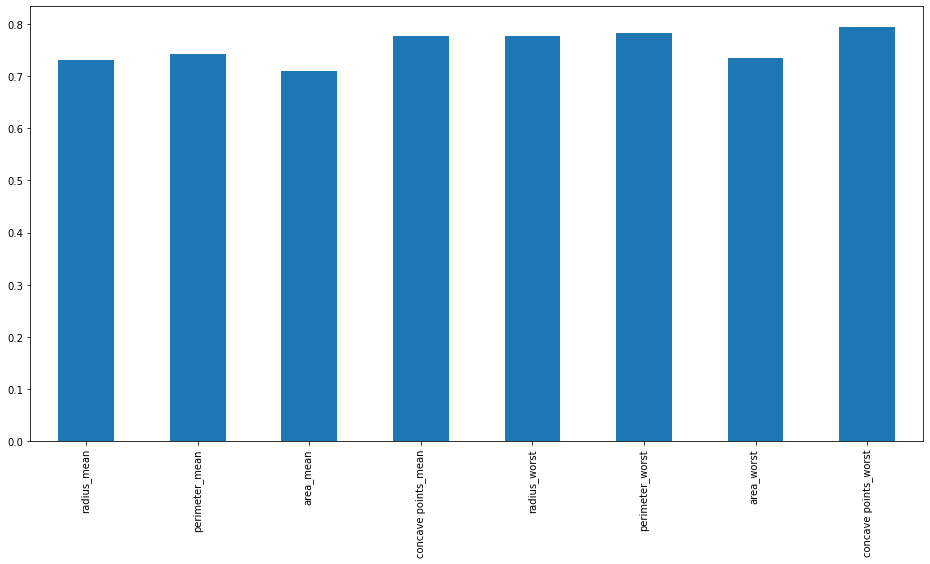

In [599]:
params_07 = get_params_diagnosis(filtered_df_07)
print('Признаки с сильной корреляцией (0.7 - 0.9) с целевой переменной:')
filtered_df_07['diagnosis_int'].dropna().plot(kind='bar');

In [600]:
interest_column_list = [column for column, value in df_07['diagnosis_int'].iteritems()]
final_df = pd.DataFrame()
interest_column_mean = [column for column in interest_column_list if column.endswith('_mean')]
interest_column_worst = [column for column in interest_column_list if column.endswith('_worst')]
final_df['diagnosis'] = df['diagnosis']
final_df['diagnosis_int'] = df['diagnosis_int']
for column in interest_column_mean:
    final_df[column] = df[column]
for column in interest_column_worst:
    final_df[column] = df[column]

Далее строим боксплоты для каждой пары наиболее коррелированных признаков с разбивкой по типу опухоли:

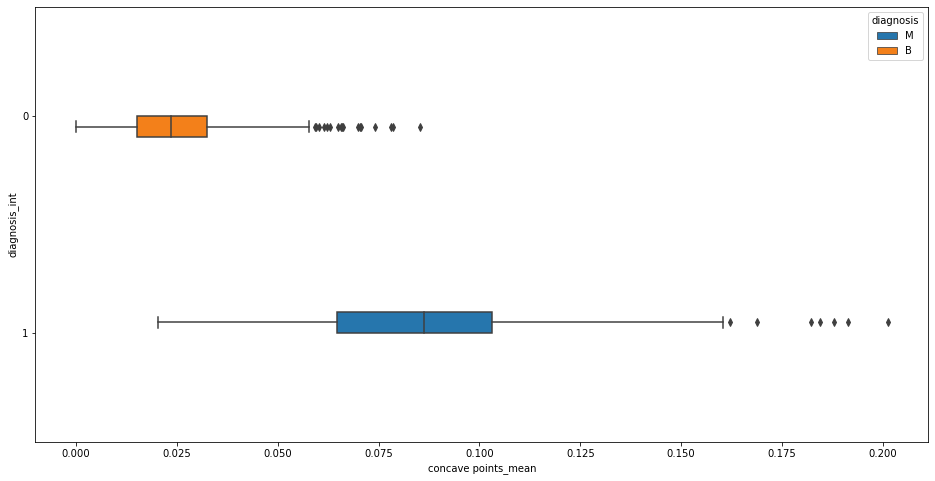

In [601]:
sns.boxplot(x='concave points_mean', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

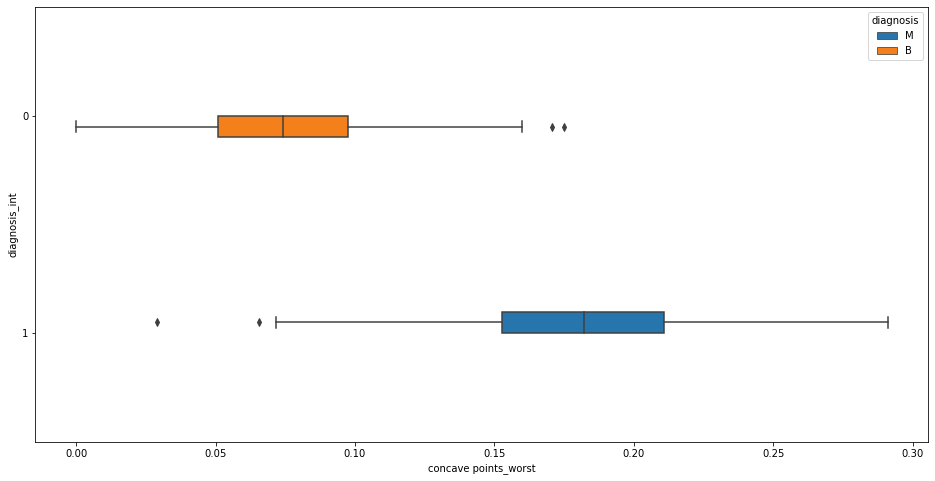

In [602]:
sns.boxplot(x='concave points_worst', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

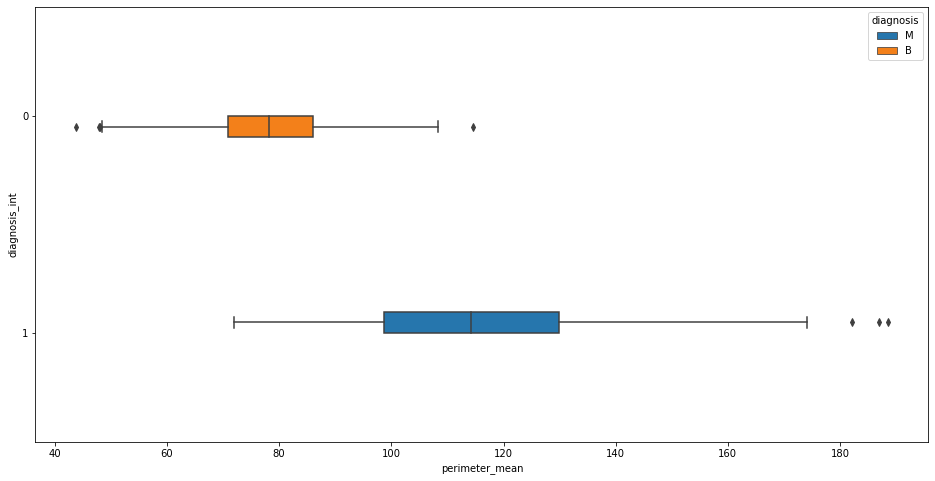

In [603]:
sns.boxplot(x='perimeter_mean', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

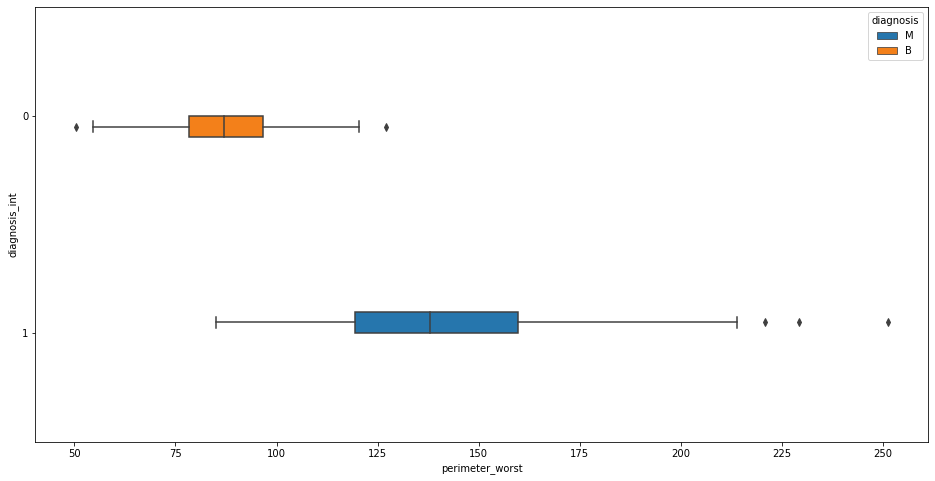

In [604]:
sns.boxplot(x='perimeter_worst', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

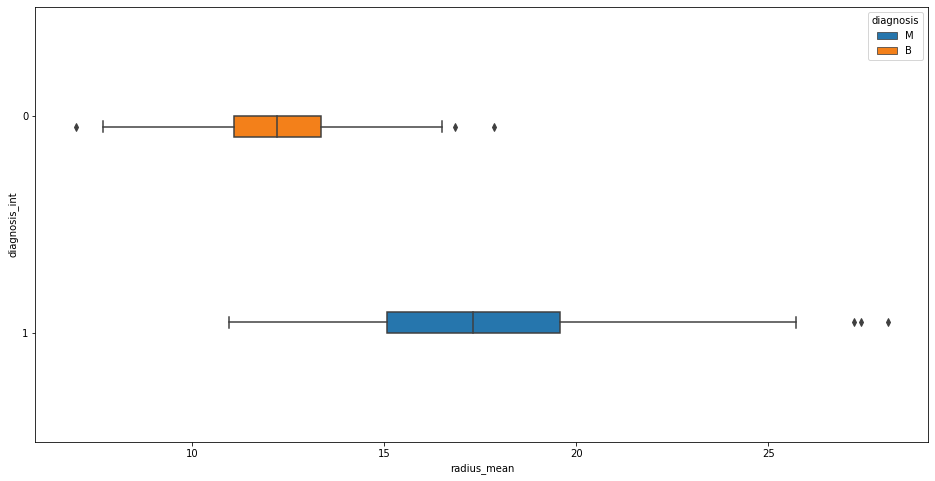

In [605]:
sns.boxplot(x='radius_mean', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

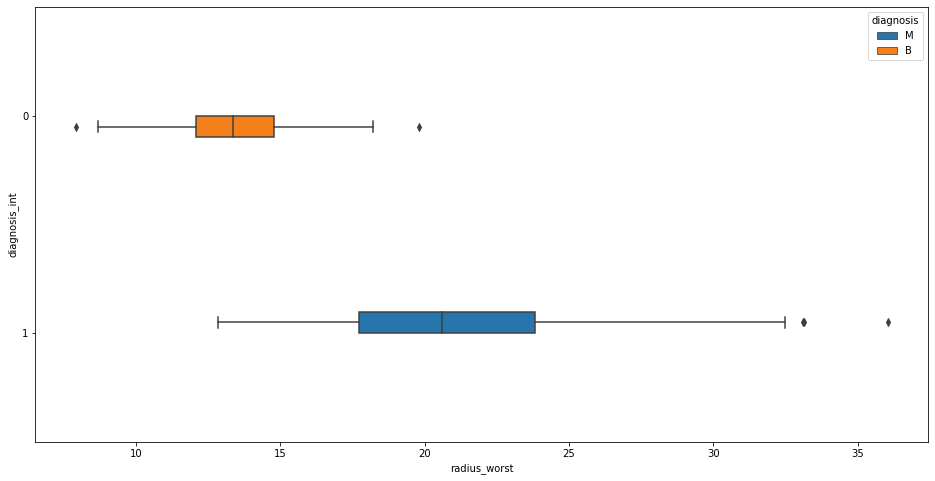

In [606]:
sns.boxplot(x='radius_worst', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

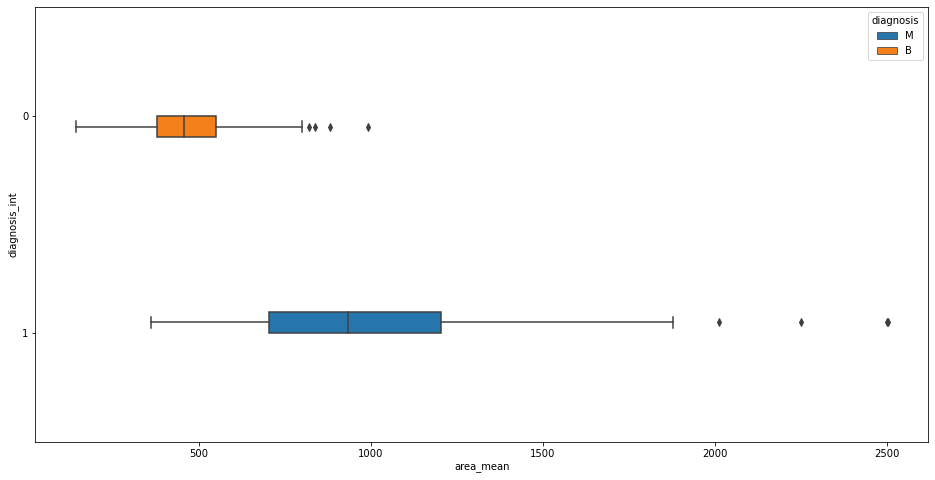

In [607]:
sns.boxplot(x='area_mean', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

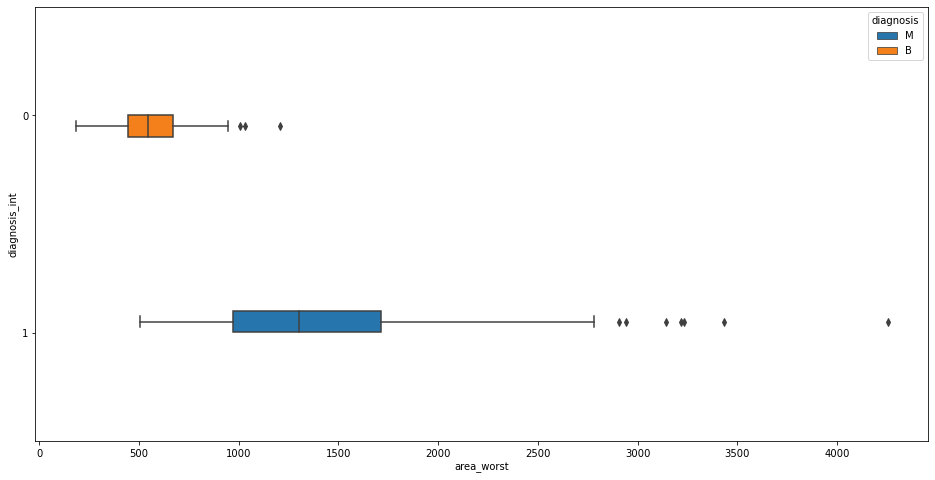

In [608]:
sns.boxplot(x='area_worst', y='diagnosis_int', data=final_df, hue='diagnosis', orient='h',width=0.2, saturation=0.9);

Из диаграмм распределения можно сделать вывод, что с определеной вероятностью можно разделить тип опухоли по 
выбранным признакам - их межквартильные интервалы не пересекаются и наблюдается сильная корреляция с целевой переменной.

Сокращаем набор данных до признаков, наиболее коррелированных с целевой переменной:

In [609]:
x=df[params_07['params']]
y=df[['diagnosis_int']]

Нормализуем данные, т.к. признаки имеют сильно отличающиеся диапазоны значений от десятых долей до тысяч, поэтому, чтобы не увеличивать значимость признаков - приводим их к одной шкале данных:

In [610]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x)
x_normalized = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y.values.ravel(), test_size=0.3, random_state=1)

Функция для оценки метрик модели

In [611]:
def model_scorer(model):
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    precision_positive = metrics.precision_score(y_test, predict, pos_label=1)
    precision_negative = metrics.precision_score(y_test, predict, pos_label=0)
    recall_sensitivity = metrics.recall_score(y_test, predict, pos_label=1)
    recall_specificity = metrics.recall_score(y_test, predict, pos_label=0)
    auc = metrics.roc_auc_score(y_test, predict)
    print('Метрики модели:')
    print(f'Accuracy: {model.score(x_test, y_test)}')
    print(f'Precision: {precision_positive, precision_negative}')
    print(f'Recall: {recall_sensitivity, recall_specificity}')
    print(f'AUC: {auc}')
    fpr, tpr, _ = metrics.roc_curve(y_test,  predict)
    plt.plot(fpr,tpr)
    plt.ylabel('Истинно-положительный результат')
    plt.xlabel('Ложно-положительный результат')
    plt.show()

Создаем модель KNN с параметрами по-умолчанию, оцениваем ее метрики:

Метрики модели:
Accuracy: 0.9415204678362573
Precision: (0.9491525423728814, 0.9375)
Recall: (0.8888888888888888, 0.9722222222222222)
AUC: 0.9305555555555556


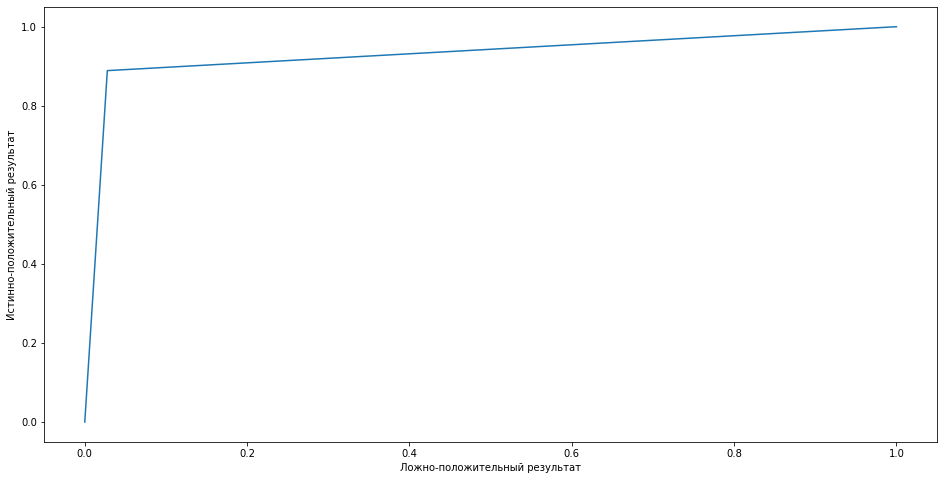

In [612]:
knn_default_model = KNeighborsClassifier()
model_scorer(knn_default_model)

Кроссвалидация, подбираем количество соседей, при котором точность предсказания максимальна.

In [624]:
neighbours = []
scores = []
for k in range(1, 100, 2):
    neighbours.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
best_n = neighbours[scores.index(max(scores))]
print(f'Оптимальное количество соседей: {best_n}')

Оптимальное количество соседей: 5


Строим модель с оптимальным параметром количества соседей, оцениваем ее метрики:

Модель с оптимальными параметрами:
Метрики модели:
Accuracy: 0.9590643274853801
Precision: (0.9827586206896551, 0.9469026548672567)
Recall: (0.9047619047619048, 0.9907407407407407)
AUC: 0.9477513227513227


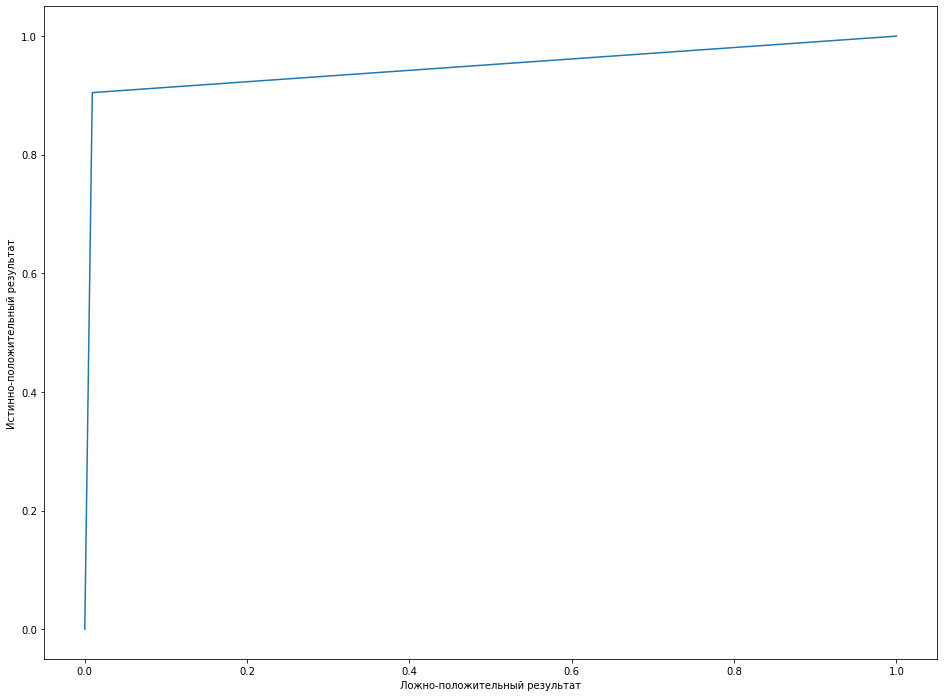

In [625]:
print('Модель с оптимальными параметрами:')
knn_optimal_model = KNeighborsClassifier(n_neighbors=best_n)
model_scorer(knn_optimal_model)

Анализ данных кросвалидации показал, что оптимальное количество соседей - 5, что совпадает со значением количества соседей, которые используются при создании модели KNN по-умолчанию, поэтому в данном случае наилучший результат совпал с результатом по-умолчанию.

Логистическая регрессия, из набора данных исключаем признаки с корреляцией > 0.85

In [626]:
filtered_df_log = df_corr_matrix[((df_corr_matrix <= 0.85) | (df_corr_matrix >= -0.85)) & (df_corr_matrix != 1.000)]
df_logres = filtered_df_log.unstack().sort_values(ascending=False).dropna()
interest_column_list = [column for column, value in df_logres['diagnosis_int'].iteritems()]
final_log_df = pd.DataFrame()
interest_column_mean = [column for column in interest_column_list if column.endswith('_mean')]
interest_column_worst = [column for column in interest_column_list if column.endswith('_worst')]
interest_column_se = [column for column in interest_column_list if column.endswith('_se')]
final_log_df['diagnosis_int'] = df['diagnosis_int']
for column in interest_column_mean:
    final_log_df[column] = df[column]
for column in interest_column_worst:
    final_log_df[column] = df[column]
for column in interest_column_se:
    final_log_df[column] = df[column]

Производим нормализацию набора данных и разбиваем данные на тренировочный и тестовый наборы.

In [627]:
x=final_log_df.drop('diagnosis_int', axis=1)
y=final_log_df[['diagnosis_int']]
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x)
x_normalized = scaler.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y.values.ravel(), test_size=0.3, random_state=1)

Признаки с корреляцией (< 0.85) с целевой переменной:


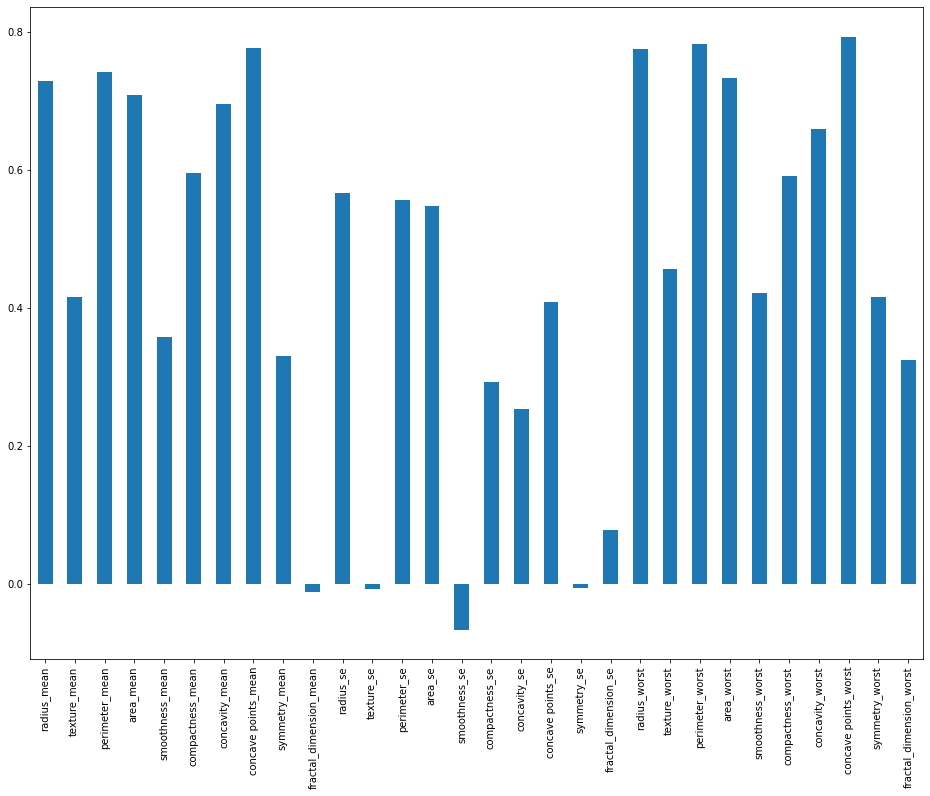

In [628]:
params_log = get_params_diagnosis(filtered_df_log)
print('Признаки с корреляцией (< 0.85) с целевой переменной:')
filtered_df_log['diagnosis_int'].dropna().plot(kind='bar');

Создаем модель логистической регрессии с параметрами по-умолчанию, оцениваем ее метрики:

Метрики модели:
Accuracy: 0.9649122807017544
Precision: (1.0, 0.9473684210526315)
Recall: (0.9047619047619048, 1.0)
AUC: 0.9523809523809523


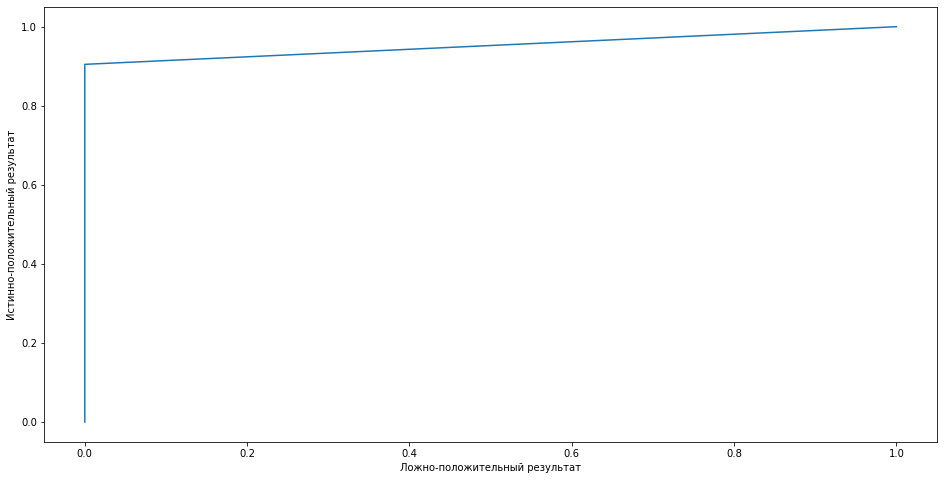

In [618]:
log_reg_defaut_model = LogisticRegression()
model_scorer(log_reg_defaut_model)

Кроссвалидация, подбираем параметр С модели логистической регрессии, при котором точность модели будет максимальна:

In [619]:
neighbours = []
scores = []
C_par = [0.001,0.01,0.1,1,10,100]
dct = {}
for k in C_par:
    neighbours.append(k)
    logreg = LogisticRegression(C=k)
    score = cross_val_score(logreg, x_train, y_train, cv=10, scoring='accuracy')
    scores.append(score.mean())
    dct[k] = score.mean()
log_best_C = neighbours[scores.index(max(scores))]    
print(f'Оптимальный C: {log_best_C}')


Оптимальный C: 10


Строим модель с оптимальным параметром С, оцениваем ее метрики:

Метрики модели:
Accuracy: 0.9649122807017544
Precision: (0.9672131147540983, 0.9636363636363636)
Recall: (0.9365079365079365, 0.9814814814814815)
AUC: 0.958994708994709


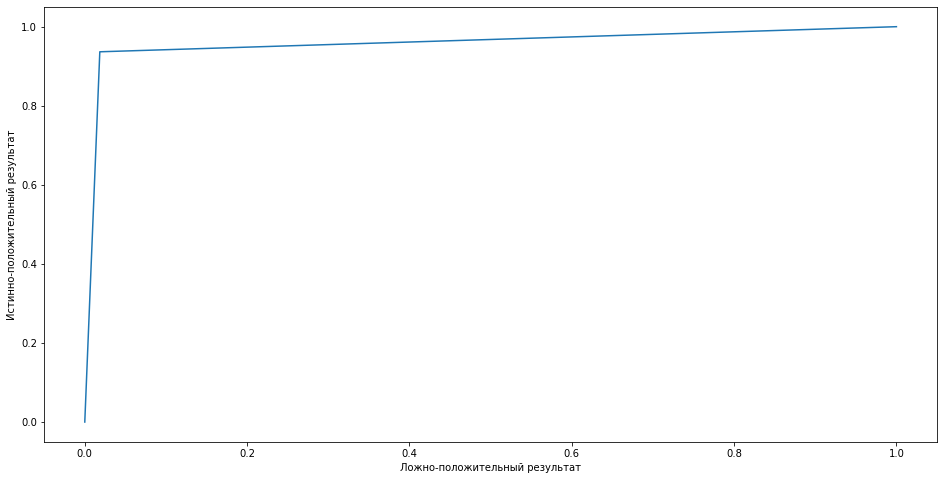

In [620]:
log_reg_defaut_model = LogisticRegression(C=log_best_C)
model_scorer(log_reg_defaut_model)

Зависимость точности модели от параметра С модели


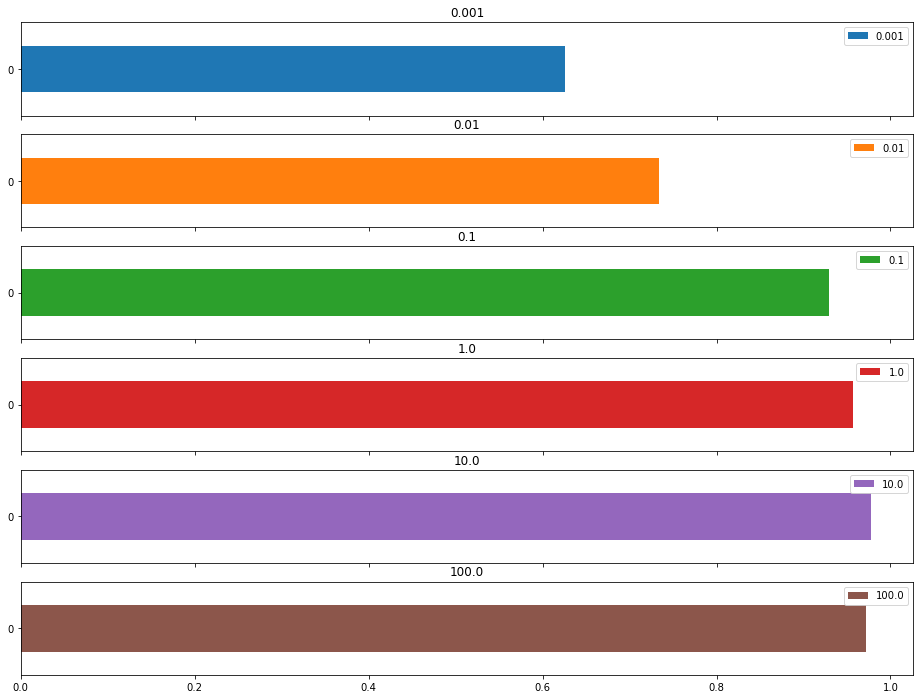

In [621]:
plt.rcParams['figure.figsize'] = (16, 12)
pd.DataFrame(dct, index=[0]).plot(kind='barh', subplots=True);
print('Зависимость точности модели от параметра С модели')

Исходя из оценок полученных метрик для каждой модели можно сделать вывод, что оба алгоритма на данном наборе имеют схожую точность, алгоритм логистической регрессии на тестовом наборе показал чуть большую точность - в пределах 1%.